#### This code draws a stacked area graph that shows how many times Palestine Chronicle, Times of Israel, and Jerusalem Post have been referred by the media/journalists in the input scope over the past three years (2018, 2019, 2020) based on an imaginary sample data file produced by the postprocessor.

In [267]:
import pandas as pd
import matplotlib.pyplot as plt

#### We could focus on a different set of sources we are interested in and a different period of times by modifying area_list and time_list defined below.

In [268]:
test_list_associated_publishers = ['Yediot', 'Times of Israel', 'Jerusalem Post']

input_file_name = 'output_dup.csv'
area_list = test_list_associated_publishers
time_list = [str(i) for i in list(range(2010, 2021))]

In [269]:
def convert_list_variables(df, list_col_names):
    '''
    Convert the column values that are lists but stored as strings
    into Python list types, based on the assumption that the format of a list looks like:
    [96adf8g9200534sf91134465, 13203fs572f502d42957dsf313]
    
    Parameters
    --------
    df: pandas dataframe
    list_col_names: list
                    The list of the column names
    '''
    for index, row in df.iterrows():
        for col_name in list_col_names:
            if pd.notnull(row[col_name]):
                print([index, col_name])
                print(row[col_name][:-1].split(" "))
                df.at[index, col_name] = row[col_name][:-1].split(" ")
                

#### The time when a source was referred is recorded based on the date of publication on which the referring article/tweet was published. e.g., If a NYT article published in 2020 refers to a Times of Israel article published in 2019, the referral is counted for 2020, not 2019.

In [270]:
def record_number_of_references_each(df, time_interval, column_name, column_value):
    '''
    Record the number of references of sources with a specific characteristic
    (e.g., sources whose 'associated publisher' is 'Times of Israel')
    
    Parameters
    --------
    df: pandas dataframe
        data read as pandas dataframe from the postprocessed .csv file
    time_interval: string
                   'month' or 'year'
    column_name: string
                 column name to focus on. e.g., 'associated publisher'
    column_value: string
                  column value for a specific source. e.g., 'Times of Israel'
                  
    Return
    --------
    date_dic: dictionary (key:time, value:the number of references)
    '''
    date_dic = {}
    
    # for each source in the area category
    for index, row in df.loc[df[column_name] == column_value].iterrows():
        # record the publication date of each referring article/tweet
        if row['referring record id'] and row['referring record id'] !="null":
            referring_record_ids = row['referring record id'][:-1].split(" ")
            for referring_id in referring_record_ids:
                if time_interval == 'year':
                    # if pd.notnull(df.at[referring_id, 'date of publication']):
                    year = df.at[referring_id, 'date of publication'][:4]
                    if type(year) is str:
                        if year not in date_dic:
                            date_dic[year] = 1
                        else:
                            date_dic[year] += 1
                if time_interval == 'month':
                    # if pd.notnull(df.at[referring_id, 'date of publication']):
                    year_month = df.at[referring_id, 'date of publication'][:7]
                    if type(year_month) is str:
                        if year_month not in date_dic:
                            date_dic[year_month] = 1
                        else:
                            date_dic[year_month] += 1
    return date_dic

In [271]:
def record_number_of_references(df, time_interval, time_list, column_name, area_list):
    '''
    Record the number of references of sources with specific characteristics
    (e.g., sources whose 'associated publisher' is 'Times of Israel',
    those whose 'associated publisher' is 'Palestine Chronicle',
    and those whose 'associated publisher' is 'Jerusalem Post')
    
    Parameters
    --------
    df: pandas dataframe
        data read as pandas dataframe from the postprocessed .csv file
    time_interval: string
                   'month' or 'year'
    column_name: string
                 column name to focus on. e.g., 'associate publisher'
    area_list: list
               a list of column value of interest
               e.g., ['Palestine Chronicle', 'Times of Israel', 'Jerusalem Post']
                  
    Return
    --------
    a pandas dataframe with time points (e.g., 2018, 2019, 2020) as indices and
    area names (e.g., 'Palestine Chronicle', 'Times of Israel', 'Jerusalem Post')
    as column labels
    '''
    data_all_area_list = []
    
    # for each area category
    for column_value in area_list:
        # date of reference for the area
        data_each_area = record_number_of_references_each(df, time_interval, column_name, column_value)
        data_each_area_list = []
        for time in time_list:
            if time in data_each_area:
                data_each_area_list.append(data_each_area[time])
            else:
                data_each_area_list.append(0)
        data_all_area_list.append(data_each_area_list)
        
    return pd.DataFrame(list(map(list, zip(*data_all_area_list))), index=time_list, columns=area_list) 

In [272]:
# read the postprocessed data file (.csv) as a pandas dataframe
with open(input_file_name, encoding='utf-8', newline='') as f:
    df_raw = pd.read_csv(input_file_name)

# set the IDs as indices
df_raw.set_index('id', inplace=True)

# convert the list variables that are stored as strings into Python list type
list_col_names = ['referring record id', 'tags']

# convert_list_variables(df_raw, list_col_names)

#### Below is how the imaginary sample data from the postprocessor, which I made up, looks like (I left unused cells empty):

In [273]:
df_raw

,url or alias text,referring record id,number of referrals,type,associated publisher,tags,name/title,language,authors,date of publication,plain text,image reference,anchor text,Unnamed: 14
id,,,,,,,,,,,,,,
d089773c-5d43-5b9e-a8e5-75d20ec19bef,http://bostonglobe.com,323939013377536000 323885048900235264,2.0,domain,Boston Globe,left-center Referring International NAmerica,Boston Globe,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138aef53-1818-5dff-869c-1ed93cfe69a1,http://chinadaily.com.cn,233487613284196352 144897069499428864,2.0,domain,China Daily,Referring International Asia,China Daily,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75d3db48-c748-5be4-bf5b-c13db430c0f2,@intifada,490380221544034304 614845408452472832,2.0,twitter handle,NaN,Referring,Electronic Intifada,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fb89429b-f929-5e65-af9a-1ef0d8a16c68,https://www.ft.com,1042066430706024450,1.0,domain,Financial Times,center Referring International Europe,Financial Times,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b6f19a93-ae89-5564-9246-6b9428bfffb1,http://www.foxnews.com,10282709857 64889403692154881,2.0,domain,Fox News,right-center Referring International NAmerica,Fox News,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655979041258782720,https://twitter.com/sheeraf/status/65597904125...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-19,NaN,NaN,NaN,NaN
563707782835085315,https://twitter.com/sheeraf/status/56370778283...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-02-06,NaN,NaN,NaN,NaN
493100064139522048,https://twitter.com/sheeraf/status/49310006413...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-07-26,NaN,NaN,NaN,NaN


In [274]:
df = record_number_of_references(df_raw, 'year', time_list, 'associated publisher', area_list)

#### Below is how the data behind the stacked area chart looks like:

In [275]:
df

,Yediot,Times of Israel,Jerusalem Post
2010,0,0,2
2011,7,0,5
2012,5,2,16
2013,7,1,9
2014,1,3,4
2015,1,2,3
2016,3,0,2
2017,1,2,10
2018,1,2,0
2019,1,0,8


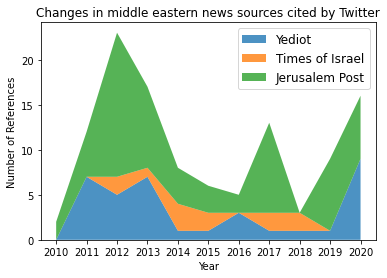

In [276]:
plt.stackplot(time_list,
              df.transpose(),
              labels=area_list,
              alpha=0.8)

plt.legend(loc=0, fontsize='large')
plt.title("Changes in middle eastern news sources cited by Twitter")
plt.ylabel("Number of References")
plt.xlabel("Year")
plt.show()

#### The data file exported as .csv file below can be used to produce a stacked area graph or graphs of similar types with other libraries/languages/tools.

In [277]:
df.to_csv('data_for_stacked_area_chart.csv')  